#  Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. 

## Изучение данных из файла

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import warnings 
from scipy import stats as st
warnings.filterwarnings('ignore')

def read(data):  #<функция вывода таблиц>
    display(data.head(10))
    print('Содержание пропусков:')
    print(data.isnull().sum())
    print('')
    print('Количество дубликатов: ', data.duplicated().sum())
    print('')
    print(data.info())
    
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

datas = [df_calls, 
         df_internet, 
         df_messages, 
         df_tariffs, 
         df_users]

datas_name = ['информация о звонках', 
              'информация об интернет-сессиях',
              'информация о сообщениях',
              'информация о тарифах',
              'информация о пользователях']

for i,j in zip(datas, datas_name) : 
    print(j)
    read(i)
    print('')

информация о звонках


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Содержание пропусков:
id           0
call_date    0
duration     0
user_id      0
dtype: int64

Количество дубликатов:  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

информация об интернет-сессиях


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Содержание пропусков:
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Количество дубликатов:  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None

информация о сообщениях


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Содержание пропусков:
id              0
message_date    0
user_id         0
dtype: int64

Количество дубликатов:  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None

информация о тарифах


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Содержание пропусков:
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

Количество дубликатов:  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None

информация о пользователях


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Содержание пропусков:
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Количество дубликатов:  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None



Рассмотрим полученную информацию более подробно:

У нас 5 таблиц с разными данными, а именно:
* users
* calls
* messages
* internet
* tariffs

Обратим внимание на каждую таблицу отдельно, рассмотрим какие столбцы и типы данных она содержит внутри себя: 
- Таблица users (информация о пользователях):
 * user_id — уникальный идентификатор пользователя
 * first_name — имя пользователя
 * last_name — фамилия пользователя
 * age — возраст пользователя (годы)
 * reg_date — дата подключения тарифа (день, месяц, год)
 * churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
 * city — город проживания пользователя
 * tarif — название тарифного плана
8 столбцов, в которых встречаются данные типа int64(2), object(6)


- Таблица calls (информация о звонках):
 * id — уникальный номер звонка
 * call_date — дата звонка
 * duration — длительность звонка в минутах
 * user_id — идентификатор пользователя, сделавшего звонок
4 столбца, в которых встречаются данные типа float64(1), int64(1), object(2)


- Таблица messages (информация о сообщениях):
 * id — уникальный номер сообщения
 * message_date — дата сообщения
 * user_id — идентификатор пользователя, отправившего сообщение
3 столбца, в которых встречаются данные типа int64(1), object(2)


- Таблица internet (информация об интернет-сессиях):
 * Unnamed: 0 - ?
 * id — уникальный номер сессии
 * mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
 * session_date — дата интернет-сессии
 * user_id — идентификатор пользователя
5 столбцов, в которых встречаются данные типа float64(1), int64(2), object(2); Однако в задании было указано 4 столбца, выявлен столбец *Unnamed: 0* неизвестного содержания, обработаем его в следующем шаге. 


- Таблица tariffs (информация о тарифах):
 * tariff_name — название тарифа
 * rub_monthly_fee — ежемесячная абонентская плата в рублях
 * minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
 * messages_included — количество сообщений в месяц, включённых в абонентскую плату
 * mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
 * rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
 * rub_per_message — стоимость отправки сообщения сверх тарифного пакета
 * rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
8 столбцов, в которых встречаются данные типа int64(7), object(1)


**Вывод:**

В данных не содежится дубликатов и пропусков, кроме столбца *churn_date*, но эти пропуски обусловлены тем, что тариф ещё действовал на момент выгрузки таблиц. Однако встречаются неправильные типы, которые будут заменены в следующем шаге. Более того надо будет также проверить данные на наличие ошибок. 

## Подготовка данных

### Предобработка

Так как таблиц довольно много будем обрабатывать их отдельно. 

Начнем с таблицы *users*: в двух столбцах *churn_date* и *reg_date* значения передаются в качестве строковых данных, для успешного анализа переведем значения в формат даты 

In [2]:
columns_users_time = ['churn_date', 'reg_date']

for i in columns_users_time:
    df_users[i] = pd.to_datetime(df_users[i], format='%Y-%m-%d')

Проверим данные таблицы на наличие ошибок: выведем методом *unique()* содержимое столбцов *age*, *city* и *tariff*

In [3]:
columns_users_check = ['age', 'city', 'tariff']

for i in columns_users_check:
    print(df_users[i].unique())
    print('******************')

[52 41 59 23 68 67 21 65 63 24 26 44 38 36 64 58 73 71 61 72 42 56 32 62
 20 51 28 66 31 37 47 40 69 48 33 39 43 46 45 55 53 34 49 25 18 70 50 19
 54 60 29 27 74 22 30 75 57 35]
******************
['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 'Улан-Удэ' 'Тула'
 'Саратов' 'Ростов-на-Дону' 'Казань' 'Иркутск' 'Курск' 'Калуга' 'Якутск'
 'Астрахань' 'Химки' 'Владикавказ' 'Волгоград' 'Саранск' 'Ижевск'
 'Новосибирск' 'Брянск' 'Тольятти' 'Нижний Тагил' 'Орёл' 'Белгород'
 'Воронеж' 'Волжский' 'Курган' 'Барнаул' 'Красноярск' 'Архангельск'
 'Липецк' 'Кемерово' 'Киров' 'Сургут' 'Пенза' 'Магнитогорск'
 'Нижний Новгород' 'Кострома' 'Владивосток' 'Тамбов' 'Балашиха'
 'Севастополь' 'Калининград' 'Оренбург' 'Смоленск' 'Нижнев

Ошибок в данных не наблюдается.

Перейдем к таблице *calls*: так как все звонки, сколько бы секунд они не длились, округляются в большую сторону, проведем эту операцию и заменим тип на целочисленный. А так же переведем в формат даты значение столбца *call_date*

In [4]:
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls['duration'] = df_calls['duration'].astype('int')

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

Проверим данные таблицы на наличие ошибок: посмотрим методами *min()* и *max()* проверим содержимое столбца *duration* на наличие выбросов:

In [5]:
print(df_calls['duration'].min())
print(df_calls['duration'].max())

0
38


Заметных выбросов не наблюдается.  

Перейдем к таблице *messages*: приведем только столбец *message_date* в формат даты:

In [6]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

В таблице *internet* столбец *mb_used* вычисляется в мегабайтах, так как стоимость снимается за целое число гигабайт, переведем значения в гигабайты, но пока округлять не будем, потому что для каждого пользователя передана информация не о сумме использования гигабайт, а о каждой сессии отдельно, так же обработаем столбец *session_date* в формат даты.

In [7]:
df_internet['mb_used'] = df_internet['mb_used'] / 1000

df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

Однако в таблице встречается столбец, которого нет в описании данных, и у него непонятное название. Определим его методом *columns()* и проверим его содержимое методом *unique()*:

In [8]:
print(df_internet.columns)
print(df_internet['Unnamed: 0'].unique())

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')
[     0      1      2 ... 149393 149394 149395]


Предположительно столбец дублирует индексы, тогда можно протсо избавиться от него. 

In [9]:
df_internet.drop('Unnamed: 0', axis=1, inplace=True)

Перейдем к таблице *tariffs*: в ней указаны неправильные значения в столбце *mb_per_month_included*, ведь у тарифа «Смарт» должно быть ровно 15 Гб, а у «Ультра» - 30 Гб, исправим это. 

In [10]:
df_tariffs['mb_per_month_included'][0] = 15000
df_tariffs['mb_per_month_included'][1] = 30000

Проверим данные после обработки:

In [11]:
for i,j in zip(datas, datas_name) : 
    print(j)
    print(i.info())
    print('')

информация о звонках
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB
None

информация об интернет-сессиях
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB
None

информация о сообщениях
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null 

**Вывод**:

Большинство из представленных данных были неправильного типа, какие то таблицы имели ошибки: неверные значения, лишние столбцы, однако по итогу предобработки данные готовы к анализу. 

### Расчеты затрат для каждого пользователя

#### Расчет количества совершенных звонков, смс и интернет сессий

Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя:

In [12]:
month =[]
for i in range(1,13):
    month.append(i)

df_month_calls_num = pd.DataFrame(index=df_users['user_id'].unique(), columns = month)
df_month_minutes_num = pd.DataFrame(index=df_users['user_id'].unique(), columns = month)

for i in df_users['user_id'].unique() :
    df_tmp = df_calls[df_calls['user_id'] == i]
    for j in month:
        df_tmp2 = df_tmp[df_tmp['call_date'].dt.month == j]
        df_month_calls_num[j][i] = df_tmp2.shape[0]
        df_month_minutes_num[j][i] = df_tmp2['duration'].sum()
        df_tmp2 = 0
    df_tmp = 0

display(df_month_calls_num.head(10)) 
display(df_month_minutes_num.head(10))

,1,2,3,4,5,6,7,8,9,10,11,12
1000,0,0,0,0,22,43,47,52,58,57,43,46
1001,0,0,0,0,0,0,0,0,0,0,59,63
1002,0,0,0,0,0,15,26,42,36,33,32,33
1003,0,0,0,0,0,0,0,55,134,108,115,108
1004,0,0,0,0,9,31,22,19,26,29,19,21
1005,15,69,77,101,73,80,77,71,66,100,75,84
1006,0,3,46,47,56,53,49,42,54,44,62,50
1007,0,0,0,25,67,68,69,74,87,69,81,72
1008,0,0,0,0,0,0,0,0,0,0,0,52
1009,0,0,13,39,28,31,22,33,25,28,39,32


,1,2,3,4,5,6,7,8,9,10,11,12
1000,0,0,0,0,159,172,340,408,466,350,338,333
1001,0,0,0,0,0,0,0,0,0,0,430,414
1002,0,0,0,0,0,117,214,289,206,212,243,236
1003,0,0,0,0,0,0,0,380,961,855,824,802
1004,0,0,0,0,35,171,135,137,117,145,117,130
1005,95,456,606,712,595,612,569,619,479,723,547,592
1006,0,42,286,356,370,478,316,275,360,267,372,379
1007,0,0,0,198,480,545,577,458,655,465,580,421
1008,0,0,0,0,0,0,0,0,0,0,0,339
1009,0,0,109,324,170,289,183,249,133,213,290,229


Для того, чтоб справиться с поставленной задачей, будем использовать 2 цикла, где первый будет создавать таблицу по каждому пользователю, а второй генерирует таблицы по ежемесячному использованию сотовой сввязи. Таким образом мы будем получать ежемесячные временные таблицы, состояющие из данных по каждому пользователю, размер которых есть число вызовов, а количество потраченных минут на разговоры - сумма столбца *duration*.

Посчитаем количество отправленных сообщений и объем израсходованного интернет-трафика по месяцам по тому же принципу, что и считали ранее:

In [13]:
df_month_messages_num = pd.DataFrame(index=df_users['user_id'].unique(), columns = month)
df_month_internet_num = pd.DataFrame(index=df_users['user_id'].unique(), columns = month)

for i in df_users['user_id'].unique() :
    df_tmp = df_messages[df_messages['user_id'] == i]
    for j in month:
        df_tmp2 = df_tmp[df_tmp['message_date'].dt.month == j]
        df_month_messages_num[j][i] = df_tmp2.shape[0]
        df_tmp2 = 0
    df_tmp = 0
    
for i in df_users['user_id'].unique() :
    df_tmp = df_internet[df_internet['user_id'] == i]
    for j in month:
        df_tmp2 = df_tmp[df_tmp['session_date'].dt.month == j]
        df_month_internet_num[j][i] = df_tmp2['mb_used'].sum()
        df_tmp2 = 0
    df_tmp = 0

display(df_month_messages_num.head(10)) 
display(df_month_internet_num.head(10)) 

,1,2,3,4,5,6,7,8,9,10,11,12
1000,0,0,0,0,22,60,75,81,57,73,58,70
1001,0,0,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,4,11,13,4,10,16,12
1003,0,0,0,0,0,0,0,37,91,83,94,75
1004,0,0,0,0,95,134,181,151,146,165,158,162
1005,7,38,56,41,42,47,56,64,52,44,51,54
1006,0,0,0,0,0,0,0,0,0,0,0,0
1007,0,0,0,11,39,26,26,27,31,18,21,26
1008,0,0,0,0,0,0,0,0,0,0,0,56
1009,0,0,2,14,7,14,14,9,12,15,11,12


,1,2,3,4,5,6,7,8,9,10,11,12
1000,0,0,0,0,2.25349,23.2338,14.0036,14.0559,14.5689,14.7025,14.7565,9.81761
1001,0,0,0,0,0,0,0,0,0,0,18.4293,14.0367
1002,0,0,0,0,0,10.8568,17.5801,20.3193,16.6911,13.8883,18.5873,18.1137
1003,0,0,0,0,0,0,0,8.56521,12.4689,14.7681,11.3569,10.1215
1004,0,0,0,0,13.404,17.6,22.2296,28.5844,15.109,18.4754,15.616,18.021
1005,2.72797,7.38393,11.1043,9.35172,7.86553,9.86319,7.69456,7.54363,7.01646,7.80093,12.6669,8.66819
1006,0,1.39215,17.2879,13.9367,12.9654,12.3717,19.9776,19.3037,15.5215,19.6966,13.2594,18.4761
1007,0,0,0,8.02276,17.6873,13.6545,15.6567,20.7004,12.6131,14.4273,16.3696,12.4941
1008,0,0,0,0,0,0,0,0,0,0,0,13.2171
1009,0,0,7.35015,14.7092,13.3719,16.0675,24.7258,23.7084,21.9326,20.0817,16.8458,18.618


Прежде чем вычислять помесячную прибыль приведем таблицы в подобающий вид:

In [14]:
options = [df_month_calls_num, 
           df_month_minutes_num, 
           df_month_messages_num,
           df_month_internet_num]

col = ['январь', 'февраль', 'март', 
       'апрель', 'май', 'июнь', 
       'июль', 'август', 'сентябрь', 
       'октябрь', 'ноябрь', 'декабрь']

for i,j in zip(options, col):
    i.rename(columns={1: 'январь', 
                      2: 'февраль', 
                      3: 'март', 
                      4: 'апрель', 
                      5: 'май', 
                      6: 'июнь', 
                      7: 'июль', 
                      8: 'август', 
                      9: 'сентябрь', 
                      10: 'октябрь', 
                      11: 'ноябрь', 
                      12: 'декабрь'}, inplace=True)
    
    i[j] = i[j].astype('int')

Отдельно проработаем каждую таблицу на изменение индекса и введения нового столбца *user_id*:

In [15]:
df_month_calls_num = df_month_calls_num.reset_index()
df_month_minutes_num = df_month_minutes_num.reset_index()
df_month_messages_num = df_month_messages_num.reset_index()
df_month_internet_num = df_month_internet_num.reset_index()

df_month_calls_num.rename(columns={'index': 'user_id'}, inplace=True)
df_month_minutes_num.rename(columns={'index': 'user_id'}, inplace=True)
df_month_messages_num.rename(columns={'index': 'user_id'}, inplace=True)
df_month_internet_num.rename(columns={'index': 'user_id'}, inplace=True)

Соединим таблицы с расходами и информацией о пользователях, чтоб получить доступ к тарифам, и удалим из полученной таблицы ненужные столбцы. 

In [16]:
df_calls_new = df_users.merge(df_month_minutes_num, on='user_id')
df_messages_new = df_users.merge(df_month_messages_num, on='user_id')
df_internet_new = df_users.merge(df_month_internet_num, on='user_id')

drop_columns = ['age', 'churn_date',
                'first_name', 
                'last_name', 'reg_date']

for i in drop_columns:
    df_calls_new = df_calls_new.drop(i, 1)
    df_messages_new = df_messages_new.drop(i, 1)
    df_internet_new = df_internet_new.drop(i, 1)

В новых таблицах найдем перерасход по параметрам, где 1 - использованный тариф *smart* не был привышен, 2 - использованный тариф *ultra* не был привышен и пользователь заплатил просто абонентскую плату, 0 - не использовал тариф, больше 3 - сумма, которая потрачена на оплату дополнительных параметров сверх тарифа.

In [17]:
def tariff_price(df, colum, smart_lim, ultra_lim, smart_price, ultra_price):
    for i in colum:
        for j in range(0, 500):
            if df['tariff'][j] == 'smart':
                if df[i][j] > smart_lim:
                    df[i][j] = (df[i][j] - smart_lim) * smart_price
                else: 
                    if (df[i][j] <= smart_lim and df[i][j] != 0):
                        df[i][j] = 1
                    if  df[i][j] == 0 :
                        df[i][j] = 0
            if df['tariff'][j] == 'ultra':
                if df[i][j] > ultra_lim:
                    df[i][j] = (df[i][j] - ultra_lim) * ultra_price
                else: 
                    if (df[i][j] <= ultra_lim and df[i][j] != 0):
                        df[i][j] = 2
                    if  df[i][j] == 0 :
                        df[i][j] = 0
    return df

df_calls_new = tariff_price(df_calls_new, 
                            col, 
                            df_tariffs['minutes_included'][0], 
                            df_tariffs['minutes_included'][1], 
                            df_tariffs['rub_per_minute'][0], 
                            df_tariffs['rub_per_minute'][1])

df_messages_new = tariff_price(df_messages_new, 
                               col, 
                               df_tariffs['messages_included'][0], 
                               df_tariffs['messages_included'][1], 
                               df_tariffs['rub_per_message'][0], 
                               df_tariffs['rub_per_message'][1])

df_internet_new = tariff_price(df_internet_new, 
                               col, 
                               df_tariffs['mb_per_month_included'][0], 
                               df_tariffs['mb_per_month_included'][1], 
                               df_tariffs['rub_per_gb'][0], 
                               df_tariffs['rub_per_gb'][1])

display(df_calls_new.head(10))
display(df_messages_new.head(10))
display(df_internet_new.head(10))

,user_id,city,tariff,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,Краснодар,ultra,0,0,0,0,2,2,2,2,2,2,2,2
1,1001,Москва,smart,0,0,0,0,0,0,0,0,0,0,1,1
2,1002,Стерлитамак,smart,0,0,0,0,0,1,1,1,1,1,1,1
3,1003,Москва,ultra,0,0,0,0,0,0,0,2,2,2,2,2
4,1004,Новокузнецк,ultra,0,0,0,0,2,2,2,2,2,2,2,2
5,1005,Набережные Челны,smart,1,1,318,636,285,336,207,357,1,669,141,276
6,1006,Ульяновск,smart,0,1,1,1,1,1,1,1,1,1,1,1
7,1007,Москва,smart,0,0,0,1,1,135,231,1,465,1,240,1
8,1008,Челябинск,smart,0,0,0,0,0,0,0,0,0,0,0,1
9,1009,Пермь,smart,0,0,1,1,1,1,1,1,1,1,1,1


,user_id,city,tariff,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,Краснодар,ultra,0,0,0,0,2,2,2,2,2,2,2,2
1,1001,Москва,smart,0,0,0,0,0,0,0,0,0,0,0,0
2,1002,Стерлитамак,smart,0,0,0,0,0,1,1,1,1,1,1,1
3,1003,Москва,ultra,0,0,0,0,0,0,0,2,2,2,2,2
4,1004,Новокузнецк,ultra,0,0,0,0,2,2,2,2,2,2,2,2
5,1005,Набережные Челны,smart,1,1,18,1,1,1,18,42,6,1,3,12
6,1006,Ульяновск,smart,0,0,0,0,0,0,0,0,0,0,0,0
7,1007,Москва,smart,0,0,0,1,1,1,1,1,1,1,1,1
8,1008,Челябинск,smart,0,0,0,0,0,0,0,0,0,0,0,18
9,1009,Пермь,smart,0,0,1,1,1,1,1,1,1,1,1,1


,user_id,city,tariff,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,Краснодар,ultra,0,0,0,0,2,2,2,2,2,2,2,2
1,1001,Москва,smart,0,0,0,0,0,0,0,0,0,0,1,1
2,1002,Стерлитамак,smart,0,0,0,0,0,1,1,1,1,1,1,1
3,1003,Москва,ultra,0,0,0,0,0,0,0,2,2,2,2,2
4,1004,Новокузнецк,ultra,0,0,0,0,2,2,2,2,2,2,2,2
5,1005,Набережные Челны,smart,1,1,1,1,1,1,1,1,1,1,1,1
6,1006,Ульяновск,smart,0,1,1,1,1,1,1,1,1,1,1,1
7,1007,Москва,smart,0,0,0,1,1,1,1,1,1,1,1,1
8,1008,Челябинск,smart,0,0,0,0,0,0,0,0,0,0,0,1
9,1009,Пермь,smart,0,0,1,1,1,1,1,1,1,1,1,1


#### Содание общей таблицы расходов по каждому пользователю

Создадим таблицу, содержащую полностью все траты на различные параметры в течение года:

In [18]:
all_costs = pd.DataFrame(columns = col)
all_costs = df_users.join(all_costs)

drop_columns = ['age', 'churn_date', 
                'first_name', 
                'last_name', 'reg_date']

for i in drop_columns:
    all_costs = all_costs.drop(i, 1)
    
ultra_cost = df_tariffs['rub_monthly_fee'][1]
smart_cost = df_tariffs['rub_monthly_fee'][0]

for i in col:
    for j in range(0,500) :
        if (df_calls_new[i][j] == 0 and df_messages_new[i][j] == 0 and df_internet_new[i][j] ==0):
            all_costs[i][j] = 0
        else:        
            penalty = 0
            if (df_calls_new[i][j] > 2) :
                penalty += df_calls_new[i][j]
            if (df_messages_new[i][j] > 2) :
                penalty += df_messages_new[i][j]
            if (df_internet_new[i][j] > 2) :
                penalty += df_internet_new[i][j]
            if (all_costs['tariff'][j] ==  'smart') :
                all_costs[i][j] = 550 + penalty
            else :
                all_costs[i][j] = 1950 + penalty
display(all_costs.head(10))         
            

,user_id,city,tariff,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,Краснодар,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950
1,1001,Москва,smart,0,0,0,0,0,0,0,0,0,0,550,550
2,1002,Стерлитамак,smart,0,0,0,0,0,550,550,550,550,550,550,550
3,1003,Москва,ultra,0,0,0,0,0,0,0,1950,1950,1950,1950,1950
4,1004,Новокузнецк,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950
5,1005,Набережные Челны,smart,550,550,886,1186,835,886,775,949,556,1219,694,838
6,1006,Ульяновск,smart,0,550,550,550,550,550,550,550,550,550,550,550
7,1007,Москва,smart,0,0,0,550,550,685,781,550,1015,550,790,550
8,1008,Челябинск,smart,0,0,0,0,0,0,0,0,0,0,0,568
9,1009,Пермь,smart,0,0,550,550,550,550,550,550,550,550,550,550


**Вывод:**

После полной обработки данных, и произведенных необходимых вычислений, получили окончательную таблицу *all_costs*, которая содержит все расходы каждого пользователя сумарно по всем параметрам. Теперь ее можно использовать для произведения анализа в следующих шагах.   

## Анализ данных

Проанализируем отдельно каждый параметр на предмет необходимости пользователям каждого тарифа. Создадим отдельно каждому параметру таблицы по тарифам и найдем среднее значение использования тарифа:   

информация о минутах


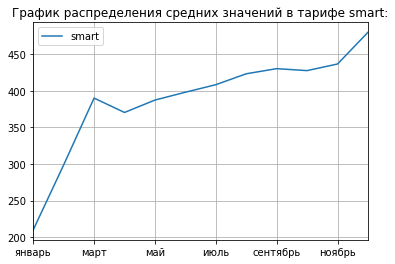

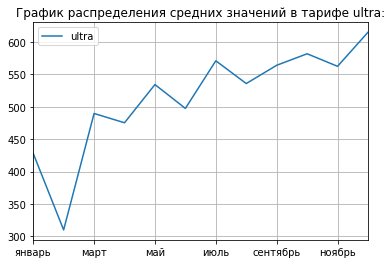

,smart,ultra
январь,210.03,428.111
февраль,298.69,310.043
март,390.052,489.649
апрель,370.441,475.302
май,387.362,534.25
июнь,398.067,497.469
июль,408.353,570.885
август,423.269,535.814
сентябрь,430.266,563.964
октябрь,427.59,581.729


информация о сообщениях


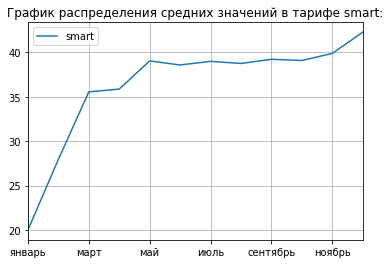

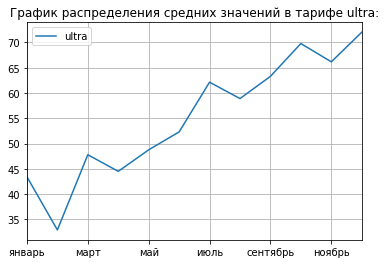

,smart,ultra
январь,20,43.4286
февраль,27.94,32.9375
март,35.5507,47.8
апрель,35.8646,44.5128
май,39.0328,48.7692
июнь,38.5775,52.3134
июль,38.9885,62.137
август,38.75,58.8977
сентябрь,39.2197,63.2947
октябрь,39.0827,69.7767


информация об интернет сессиях


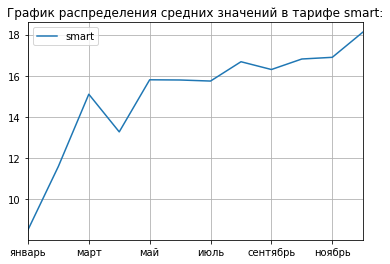

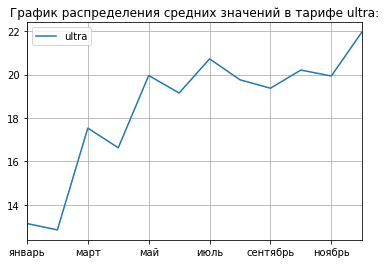

,smart,ultra
январь,8.51372,13.1407
февраль,11.5971,12.8465
март,15.1042,17.5356
апрель,13.2752,16.6296
май,15.8052,19.9589
июнь,15.7946,19.153
июль,15.7432,20.7234
август,16.6817,19.7607
сентябрь,16.3036,19.3727
октябрь,16.8143,20.2096


In [19]:
df_calls_new2 = df_users.merge(df_month_minutes_num, on='user_id')
df_messages_new2 = df_users.merge(df_month_messages_num, on='user_id')
df_internet_new2 = df_users.merge(df_month_internet_num, on='user_id')

for i in drop_columns:
    df_calls_new2 = df_calls_new2.drop(i, 1)
    df_messages_new2 = df_messages_new2.drop(i, 1)
    df_internet_new2 = df_internet_new2.drop(i, 1)

def mean_value(df, columns):
    df_tariffs_parametrs = pd.DataFrame(columns=['smart', 'ultra'], index = col)
    df_smart_parametr = df.query('tariff == "smart"')
    df_ultra_parametr = df.query('tariff == "ultra"')
    df_smart_parametr = df_smart_parametr.reset_index(drop=True)
    df_ultra_parametr = df_ultra_parametr.reset_index(drop=True)
    
    tmp = 0
    array_tmp = []
    for i in columns:
        for j in range(0, df_smart_parametr.shape[0]):
            if df_smart_parametr[i][j] != 0:
                tmp += df_smart_parametr[i][j]
                array_tmp.append(df_smart_parametr[i][j])
        df_tariffs_parametrs['smart'][i] = tmp / len(array_tmp)
        tmp = 0
        array_tmp = []
    for i in columns:
        for j in range(0, df_ultra_parametr.shape[0]):
            if df_ultra_parametr[i][j] != 0:
                tmp += df_ultra_parametr[i][j]
                array_tmp.append(df_ultra_parametr[i][j])
        df_tariffs_parametrs['ultra'][i] = tmp / len(array_tmp)
        tmp = 0
        array_tmp = []
        
    df_tariffs_parametrs.plot(y='smart', 
                         style='-', 
                         grid=True) 
    plt.title('График распределения средних значений в тарифе smart:')
    plt.show()
    df_tariffs_parametrs.plot(y='ultra', 
                         style='-', 
                         grid=True) 
    plt.title('График распределения средних значений в тарифе ultra:')
    plt.show()
    display(df_tariffs_parametrs)
    
dfs = [df_calls_new2,
       df_messages_new2,
       df_internet_new2]

names = ['информация о минутах', 
         'информация о сообщениях', 
         'информация об интернет сессиях']

for i, j in zip(dfs, names):
    print(j)
    mean_value(i, col)

Плученные графики свидетельствуют о сильном увеличении использования связи к концу года, это скорее всего связанно с ростом числа пользователей в каждом месяце. Чтоб удостовериться в правоте суждений, проверим сколько приблизительно пользователей присоединилось в каждом месяце. Для этого посчитаем количество значений не равных 0 в таблице какого нибудь из тарифов:

In [20]:
cnt = 0
for i in col:
    for j in range(0, 500) :
        if df_month_calls_num[i][j] != 0:
            cnt += 1
    print('В месяце "', i, '" количество активных ползователей составляет:', cnt)
    cnt = 0

В месяце " январь " количество активных ползователей составляет: 43
В месяце " февраль " количество активных ползователей составляет: 82
В месяце " март " количество активных ползователей составляет: 114
В месяце " апрель " количество активных ползователей составляет: 165
В месяце " май " количество активных ползователей составляет: 205
В месяце " июнь " количество активных ползователей составляет: 244
В месяце " июль " количество активных ползователей составляет: 289
В месяце " август " количество активных ползователей составляет: 337
В месяце " сентябрь " количество активных ползователей составляет: 370
В месяце " октябрь " количество активных ползователей составляет: 411
В месяце " ноябрь " количество активных ползователей составляет: 444
В месяце " декабрь " количество активных ползователей составляет: 470


Действительно, в среднем количество пользователей в каждом месяце растет примерно в 1,5-2 раза по сравнению с предыдущем.

Найдем ежемесячную дисперсию и среднеквадратическое отклонение:

информация о минутах

Дисперсия


,smart,ultra
январь,22489.9,64683.9
февраль,35784.5,83914.4
март,36344.9,108374
апрель,33553,64790.9
май,34573.1,73711
июнь,29776.7,84957.7
июль,32089.8,83249.1
август,34031.2,88382.2
сентябрь,32823.3,95732.5
октябрь,34770.5,96317.1


Среднеквадратическое отклонение


,smart,ultra
январь,149.966,254.33
февраль,189.168,289.68
март,190.643,329.203
апрель,183.175,254.54
май,185.938,271.498
июнь,172.559,291.475
июль,179.136,288.529
август,184.476,297.291
сентябрь,181.172,309.407
октябрь,186.468,310.35


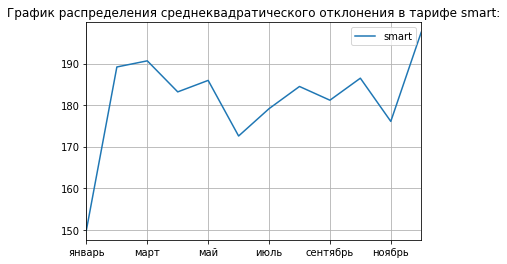

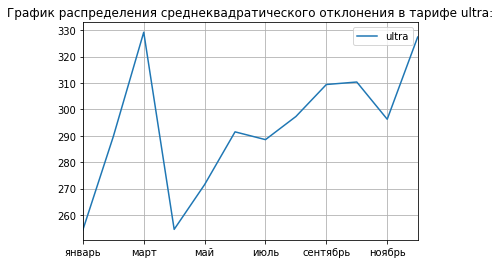

информация о сообщениях

Дисперсия


,smart,ultra
январь,244,655.959
февраль,431.656,668.809
март,660.074,1753.6
апрель,512.471,1372.15
май,633.54,1529.56
июнь,726.483,1906.78
июль,715.218,2160.72
август,763.452,1999.98
сентябрь,699.355,1886.69
октябрь,733.603,2403.05


Среднеквадратическое отклонение


,smart,ultra
январь,15.6205,25.6117
февраль,20.7763,25.8613
март,25.6919,41.876
апрель,22.6378,37.0425
май,25.1702,39.1096
июнь,26.9534,43.6667
июль,26.7436,46.4836
август,27.6306,44.7211
сентябрь,26.4453,43.4361
октябрь,27.0851,49.0209


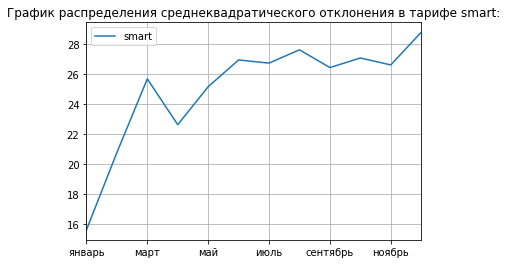

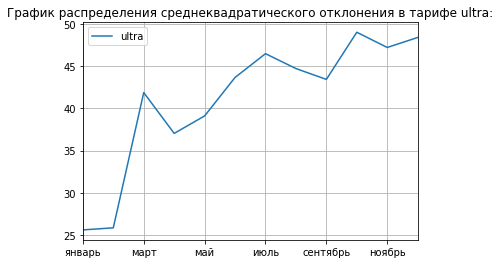

информация об интернет сессиях

Дисперсия


,smart,ultra
январь,40.3123,41.896
февраль,38.3565,104.706
март,33.5272,116.7
апрель,28.4564,89.7888
май,35.4858,90.5857
июнь,33.333,81.9905
июль,34.6034,96.5889
август,30.1031,106.109
сентябрь,26.8958,86.7224
октябрь,33.3707,92.7804


Среднеквадратическое отклонение


,smart,ultra
январь,6.3492,6.47271
февраль,6.19326,10.2326
март,5.79027,10.8028
апрель,5.33445,9.47569
май,5.95699,9.51765
июнь,5.77347,9.05486
июль,5.88247,9.82796
август,5.48663,10.3009
сентябрь,5.18611,9.31248
октябрь,5.77674,9.63226


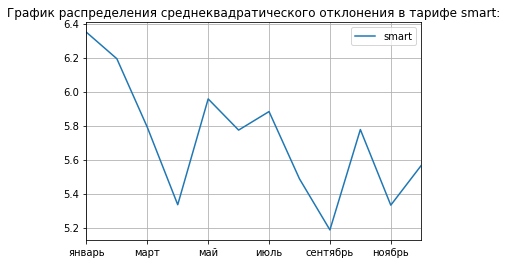

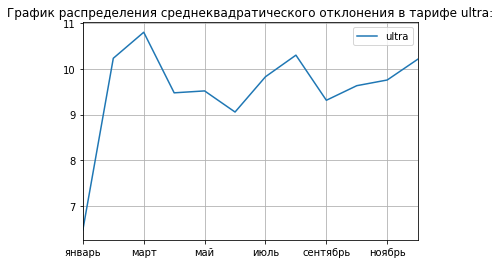

In [21]:
def var_value(df, columns):
    df_tariffs_parametrs = pd.DataFrame(columns=['smart', 'ultra'], index = col)
    df_smart_parametr = df.query('tariff == "smart"')
    df_ultra_parametr = df.query('tariff == "ultra"')
    df_smart_parametr = df_smart_parametr.reset_index(drop=True)
    df_ultra_parametr = df_ultra_parametr.reset_index(drop=True)
    
    array_tmp = []
    for i in columns:
        for j in range(0, df_smart_parametr.shape[0]):
            if df_smart_parametr[i][j] != 0:
                array_tmp.append(df_smart_parametr[i][j])
        df_tariffs_parametrs['smart'][i] = np.var(array_tmp, ddof=0)
        array_tmp = []
    for i in columns:
        for j in range(0, df_ultra_parametr.shape[0]):
            if df_ultra_parametr[i][j] != 0:
                array_tmp.append(df_ultra_parametr[i][j])
        df_tariffs_parametrs['ultra'][i] = np.var(array_tmp, ddof=0)
        array_tmp = []

    print('Дисперсия')
    display(df_tariffs_parametrs)
    for i in ['smart', 'ultra']:
        for j in col :
            df_tariffs_parametrs[i][j] = np.sqrt(df_tariffs_parametrs[i][j])
    print('Среднеквадратическое отклонение')
    display(df_tariffs_parametrs)
    df_tariffs_parametrs.plot(y='smart', 
                         style='-', 
                         grid=True) 
    plt.title('График распределения среднеквадратического отклонения в тарифе smart:')
    plt.show()
    df_tariffs_parametrs.plot(y='ultra', 
                         style='-', 
                         grid=True) 
    plt.title('График распределения среднеквадратического отклонения в тарифе ultra:')
    plt.show()

for i, j in zip(dfs, names):
    print(j)
    print('')
    var_value(i, col)

**Вывод**

Полученные данные предоставляют полную картину о распределении имеющихся данных, а именно: можно точно узнать в каком диапозоне находится 95% данных, какие значения являются средними для каждого месяца, и как количество пользователей в каждом месяце влияет на спрос и выручку. 

## Проверка гипотез

### Сравнение средней выручки пользователей разных тарифов

Будем использовать t-распределение Стъюдента для расчета гипотез. 

Сформулируем нулевую гипотезу: средняя выручка с тарифа ultra равна средней выручке тарифа smart;
Тогда альтернативная гипотеза будет гласить: выручки с обоих тарифов отличаются. 

Для работы над гипотезой будем использоваать таблицу *all_costs*, полученную в 3 пункте, которая содержит в себе информацию о прибыли с каждого пользователя обоих тарифов. 

In [22]:
smart_query = all_costs.query('tariff == "smart"')
ultra_query = all_costs.query('tariff == "ultra"')

def tariff_m(tariff_query):
    tariff_query = tariff_query.reset_index(drop=True)
    tariff_mean = []
    for i in col:
        for j in range(0, tariff_query.shape[0]):
            if tariff_query[i][j] != 0:
                tariff_mean.append(tariff_query[i][j])
    return tariff_mean

smart_mean = tariff_m(smart_query)
ultra_mean = tariff_m(ultra_query)

smart_var = np.var(smart_mean)
ultra_var = np.var(ultra_mean)

if (smart_var == ultra_var) :
    print('использовать equal_val = True')
else:
    print('использовать equal_val = False')

использовать equal_val = False


In [23]:
results = st.ttest_ind(smart_mean, ultra_mean, equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  0.0


P-значение равно нулю, это связанно с тем что все значения тарифа *ultra* равны 1950, то есть никто не превысил заданных лимитов, в связи с чем дисперсия равна нулю. Следовательно можно с уверенностью отвергнуть нулевую гипотезу о том, что средняя выручка с клиентов разных тарифов равна, а именно, если быть точнее, средняя выручка с клиентов *ultra* больше. 

### Сравнение выручки пользователей из Москвы и других регионов

Проверим следующую гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. 

Нулевая гипотеза: средняя выручка с обоих регеонов одинаковая. 
Альтернативная гипотеза: средняя выручка отличается.

In [24]:
Moscow_query = all_costs.query('city == "Москва"')
another_city_query = all_costs.query('city != "Москва"')

def city_m(city_query):
    city_query = city_query.reset_index(drop=True)
    city_mean = []
    for i in col:
        for j in range(0, city_query.shape[0]):
            if city_query[i][j] != 0:
                city_mean.append(city_query[i][j])
    return city_mean

Moscow_mean = city_m(Moscow_query)
another_city_mean = city_m(another_city_query)

Moscow_var = np.var(Moscow_mean)
another_city_var = np.var(another_city_mean)

if (Moscow_var == another_city_var) :
    print('использовать equal_val = True')
else:
    print('использовать equal_val = False')

использовать equal_val = False


In [25]:
results = st.ttest_ind(Moscow_mean, another_city_mean, equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  0.0029143603833040386


Полученное p-значение позволяет отвергнуть нулевую гипотезу о равенстве прибыли с городов России и Москвы.

Получение гистограммы распределения частот

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cf2f3c350>]],
      dtype=object)

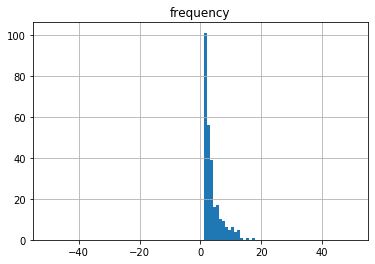

In [26]:
value_list = []
frequency_list = []

for i in range(0, len(another_city_mean)):
    if another_city_mean[i] in value_list:
        cnt = value_list.index(another_city_mean[i])
        frequency_list[cnt] += 1
    else :
        value_list.append(another_city_mean[i])
        frequency_list.append(1)

df_smart_plot = pd.DataFrame(columns = ['value', 'frequency'])
df_smart_plot['value'] = value_list
df_smart_plot['frequency'] = frequency_list
df_smart_plot= df_smart_plot.sort_values(by='frequency')
df_smart_plot = df_smart_plot.set_index('value')
df_smart_plot.hist('frequency', bins=100, range=(-50,50))

## Общий вывод

Проведенный анализ показал, что люди в основном не превышают лимиты по различным параметрам в тарифе *ultra*, чего не скажешь о тарифе *smart*. Однако даже перерасход тарифа *smart* и его значительно превышающее коичество пользователей не обеспечивает той прибыли, что дает *ultra*. Также немаловажным является тот факт, что выручка с пользователей города Москвы выше, чем во всех остальных городах. 

Таким образом можно сделать вывод, что в Москве и остальных крупных городах лучше всего привлекать больше пользователей к тарифу *ultra*, а вот в региональных городах наоборот рекламировать тариф *smart*, который своей дешевизной будет привлекать клиентов в разы больше чем *ultra*, а завышенные цены на дополнительные услуги будут компенсировать ту выручку, которую можно было бы получить, если бы пользователь использовал бы тариф *ultima*.